In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from animal_plotting import *

in_file = os.path.join("results_data","Animal_Shelter_Final.csv")
final_df = pd.read_csv(in_file)
final_df.head(1)

,animal_id,name,datetime,found_location,type,intake_condition,sex,age,breed,color_primary,color_secondary,num_stays,avg_stay_len
0,A200922,Carlos,2013-10-03 15:47:00,Austin (TX),Owner Surrender,Normal,Neutered Male,16,Dachshund Mix,Black,Tan,1,49.747917


In [2]:
avg_stay_length_total = final_df["avg_stay_len"].mean()
avg_num_stays_total = final_df["num_stays"].mean()
(avg_num_stays_total, avg_stay_length_total)

(1.1364390752248255, 25.29182337994744)

In [3]:
color_dict = {
    "Black":"#000000",
    "White":"#FFFFFF",
    "Brown":"#8B4513",
    "Tan":"#D2B48C",
    "Blue":"#B0C4DE",
    "Red":"#A52A2A",
    "Gray":"#808080",
    "Yellow":"#FAFAD2",
    "Tricolor":"#DCDCDC",
    "Pink":"#FF69B4"
}

In [4]:
avg_stay_by_color = final_df.groupby("color_primary").mean().sort_values("avg_stay_len", ascending=False)
num_stay_by_color = final_df.groupby("color_primary").count()

avg_stay_by_color_2nd = final_df.groupby("color_secondary").mean()
num_stay_by_color_2nd = final_df.groupby("color_secondary").count()

color_order = list(avg_stay_by_color.index) + ["Pink"]

In [5]:
scale_factor_primary = get_scale_factor(avg_stay_by_color, num_stay_by_color, color_order[:-1], len(final_df))
scale_factor_secondary = get_scale_factor(avg_stay_by_color_2nd, num_stay_by_color_2nd, color_order[:-1], len(final_df))

In [8]:
out_path = "results_data"

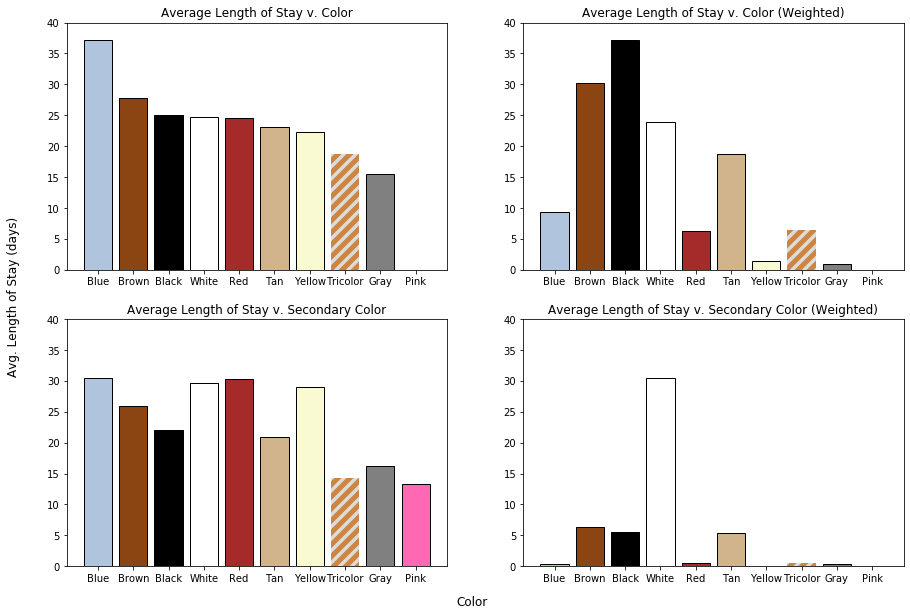

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15, 10))
ylim=[0, 40]
ylim_weighted = [0, 12]

fig.text(0.5, 0.07, 'Color', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'Avg. Length of Stay (days)', va='center', rotation='vertical', fontsize=12)

ax1[0].set_title("Average Length of Stay v. Color")
ax1[0].set_ylim(ylim)
plot_bars(avg_stay_by_color, ax1[0], color_order, color_dict)

ax1[1].set_title("Average Length of Stay v. Color (Weighted)")
ax1[1].set_ylim(ylim)
plot_bars(avg_stay_by_color, ax1[1], color_order, color_dict, weighted=True, num_df=num_stay_by_color, total_dogs=len(final_df), scale_factor=scale_factor_primary)

ax2[0].set_title("Average Length of Stay v. Secondary Color")
ax2[0].set_ylim(ylim)
plot_bars(avg_stay_by_color_2nd, ax2[0], color_order, color_dict)

ax2[1].set_title("Average Length of Stay v. Secondary Color (Weighted)")
ax2[1].set_ylim(ylim)
plot_bars(avg_stay_by_color_2nd, ax2[1], color_order, color_dict, weighted=True, num_df=num_stay_by_color_2nd, total_dogs=len(final_df), scale_factor=scale_factor_secondary)

out_file = os.path.join(out_path, "AvgLenStayByColor.png")
plt.savefig(out_file, dpi=300)

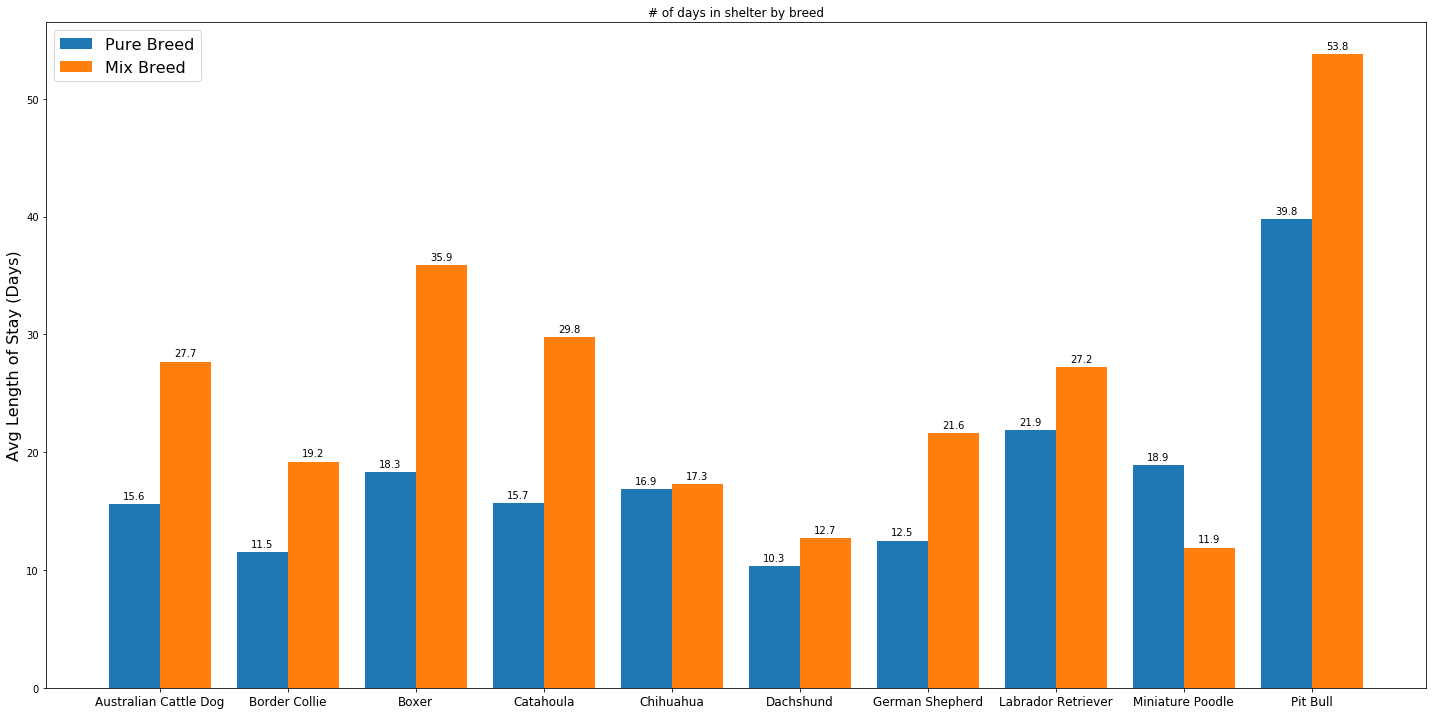

In [12]:
labels = ['Australian Cattle Dog', 'Border Collie', 'Boxer', 
          'Catahoula', 'Chihuahua', "Dachshund", "German Shepherd",
          "Labrador Retriever", "Miniature Poodle", "Pit Bull"]
pure_stay = [15.6, 11.5, 18.3, 15.7, 16.9, 10.3, 12.5, 21.9, 18.9, 39.8]
mix_stay = [27.7, 19.2, 35.9, 29.8, 17.3, 12.7, 21.6, 27.2, 11.9, 53.8]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pure_stay, width, label='Pure Breed')
rects2 = ax.bar(x + width/2, mix_stay, width, label='Mix Breed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg Length of Stay (Days)', fontsize=16)
ax.set_title('# of days in shelter by breed')
plt.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=16)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.rcParams["figure.figsize"]=(20,10)

out_file = os.path.join(out_path, "NumberOfDaysInShelterByBreed.png")
plt.savefig(out_file, dpi=300)
plt.show()

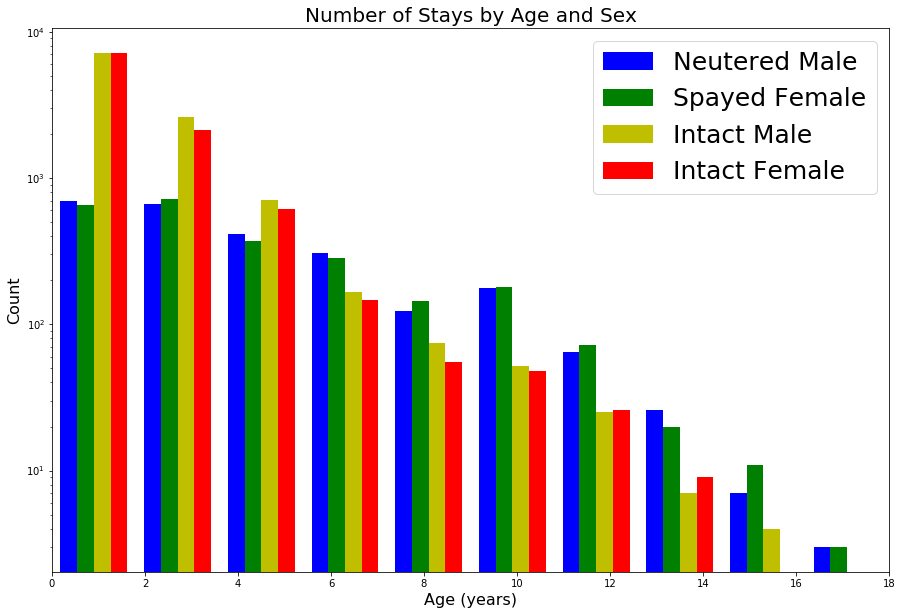

In [13]:
y1 = final_df.loc[final_df.sex == 'Neutered Male', "age" ]
y2 = final_df.loc[final_df.sex == 'Spayed Female', "age"] 
y3 = final_df.loc[final_df.sex == 'Intact Male', 'age']
y4 = final_df.loc[final_df.sex == 'Intact Female', 'age']
colors = ['b','g', 'y','r']
#plots the histogram
fig, ax1 = plt.subplots()
ax1.hist([y1, y2, y3,y4],color=colors, label=['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female'])
plt.yscale("log")
ax1.set_xlim(0,18)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Age (years)", fontsize=16)
plt.title("Number of Stays by Age and Sex", fontsize=20)

plt.legend(prop={"size":25})
fig2 = plt.gcf()

fig2.set_size_inches(15, 10)
out_file = os.path.join(out_path, "StaysByAgeSex.png")
plt.savefig(out_file, dpi=300)
plt.show()

<b>Unused Plot -- too noisy

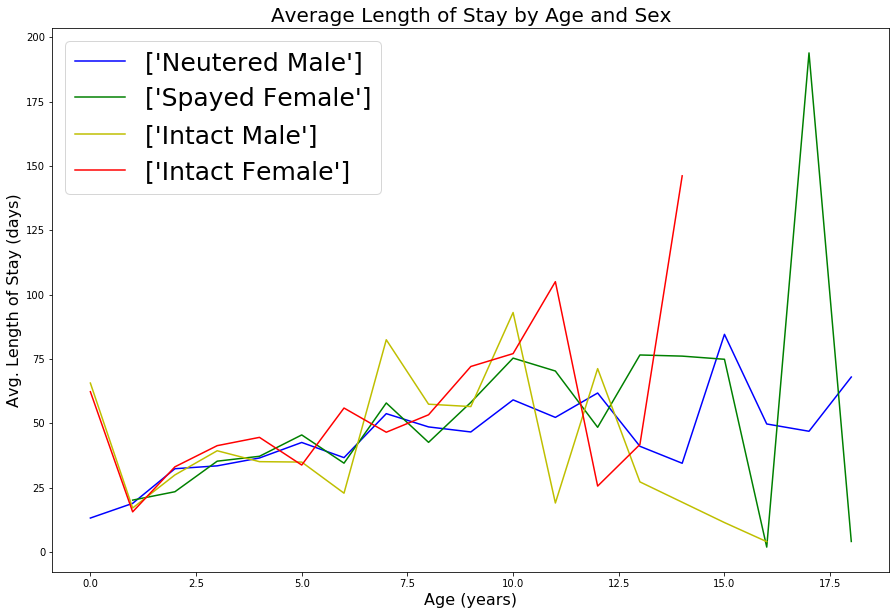

In [14]:
agesex_plot = final_df.groupby(["sex", "age"]).mean()["avg_stay_len"].reset_index()

y1 = agesex_plot.loc[agesex_plot.sex == 'Neutered Male']
y2 = agesex_plot.loc[agesex_plot.sex == 'Spayed Female'] 
y3 = agesex_plot.loc[agesex_plot.sex == 'Intact Male']
y4 = agesex_plot.loc[agesex_plot.sex == 'Intact Female']
colors = ['b','g', 'y','r']
#plots the histogram
fig3, ax3 = plt.subplots()
ax3.plot(y1["age"], y1["avg_stay_len"], color=colors[0], label=['Neutered Male'])
ax3.plot(y2["age"], y2["avg_stay_len"], color=colors[1], label=['Spayed Female'])
ax3.plot(y3["age"], y3["avg_stay_len"], color=colors[2], label=['Intact Male'])
ax3.plot(y4["age"], y4["avg_stay_len"], color=colors[3], label=['Intact Female'])
        
# plt.yscale("log")
ax1.set_xlim(0,18)
plt.ylabel("Avg. Length of Stay (days)", fontsize=16)
plt.xlabel("Age (years)", fontsize=16)
plt.title("Average Length of Stay by Age and Sex", fontsize=20)

plt.legend(prop={"size":25})

fig3.set_size_inches(15, 10)
out_file = os.path.join(out_path, "LenStayBySexAge.png")
plt.savefig(out_file, dpi=300)
plt.show()